In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

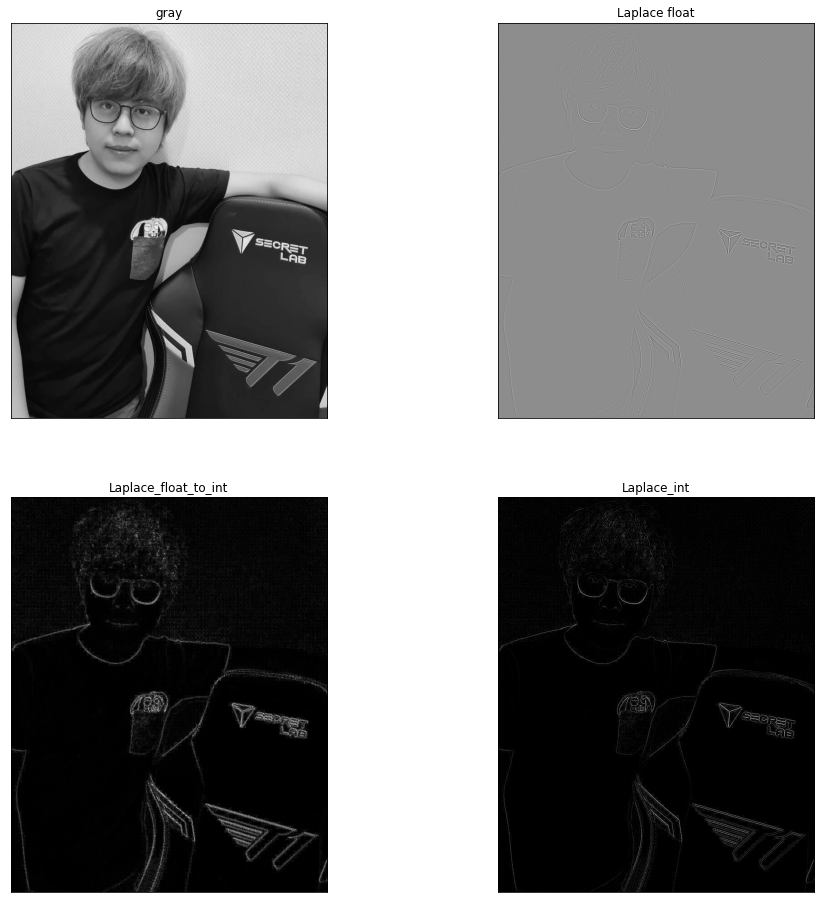

In [2]:
img = cv2.imread('xepher.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#CV_64f -> Float 64 (return min)
#CV_8U -> uint8
#kernel laplace (no need specify x or y)
# [0 1 0]    [1 1 1]
# [1 4 1] or [1 8 1]
# [0 1 0]    [1 1 1]


laplace = cv2.Laplacian(gray, cv2.CV_64F) 
laplace_cvt = np.uint8(np.abs(laplace))
laplace_int = cv2.Laplacian(gray,cv2.CV_8U)
laplaces = [gray,laplace,laplace_cvt,laplace_int]
title=['gray','Laplace float','Laplace_float_to_int','Laplace_int']

plt.figure(1, figsize=(16,16))
for i in range(len(laplaces)):
    plt.subplot(2,2,i+1)
    plt.imshow(laplaces[i],cmap='gray')
    plt.title(title[i])
    plt.xticks([]),plt.yticks([])
    

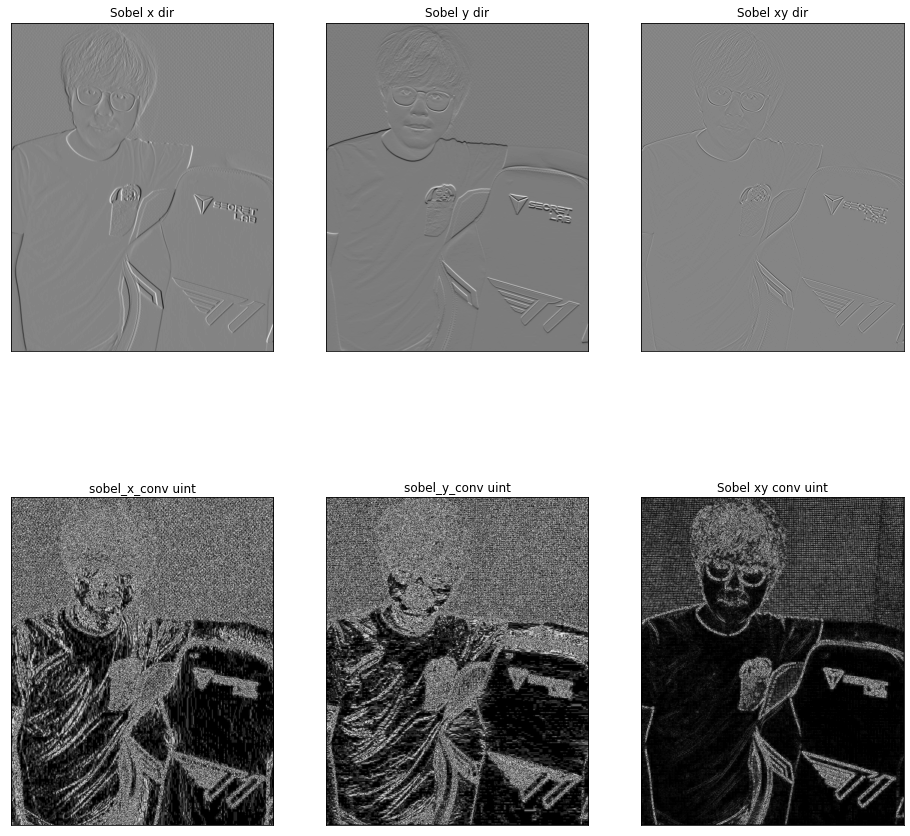

In [3]:
#sobel x kernel (specify x and y)
# [-1 0 1]
# [-2 0 2]
# [1 0 1]

#params = img, convert value, count x (higher value, higher derivative), count y,ksize (1,3,5,7)
sobel_x = cv2.Sobel(gray,cv2.CV_64F, 1, 0, ksize = 5)
sobel_y = cv2.Sobel(gray,cv2.CV_64F, 0, 1, ksize = 5)
sobel_xy = cv2.Sobel(gray,cv2.CV_64F, 1, 1, ksize = 5)
sobel_x_conv = np.uint8(np.abs(sobel_x))
sobel_y_conv = np.uint8(np.abs(sobel_y))
sobel_xy_conv = np.uint8(np.abs(sobel_xy))

sobels = [sobel_x,sobel_y,sobel_xy,sobel_x_conv,sobel_y_conv,sobel_xy_conv]
titles = ['Sobel x dir','Sobel y dir','Sobel xy dir','sobel_x_conv uint','sobel_y_conv uint','Sobel xy conv uint']

plt.figure(1, figsize=(16,16))
for i, (image,title) in enumerate(zip(sobels,titles)):
    plt.subplot(2,3,i+1)
    plt.imshow(image,cmap='gray')
    plt.title(title)
    plt.xticks([]),plt.yticks([])

(([], []), ([], []))

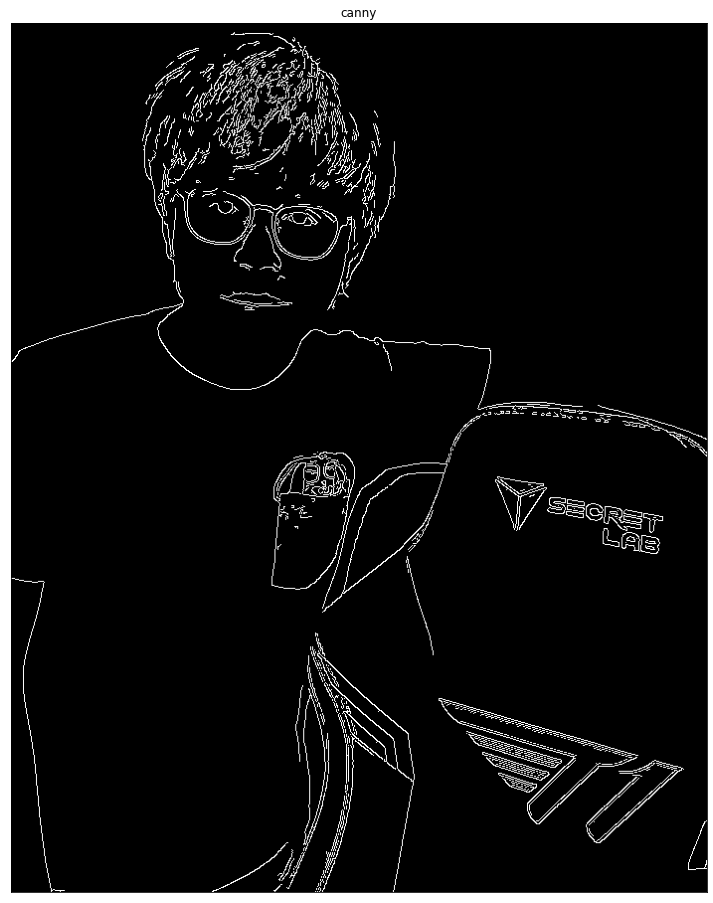

In [4]:
#Canny
#noise reduction -> reduce noise (usually use gaussian blur automatically)
#gradient calculation -> kernel sobel xy (find edge & orientation) use inv tan
#non max suppresion -> thinning edge (check the neighboor pixel to find max value to keep)
#double threshold -> thresholding(up than threshold take it, middle calculate again)
#edge tracking (in the middle of threholding, it will maximize the calculation of its pixel) 

canny = cv2.Canny(gray, 100,200)#img, threshold1,threshold2

plt.figure(figsize=(16,16))
plt.imshow(canny,cmap='gray')
plt.title('canny')
plt.xticks([]),plt.yticks([])

(([], []), ([], []))

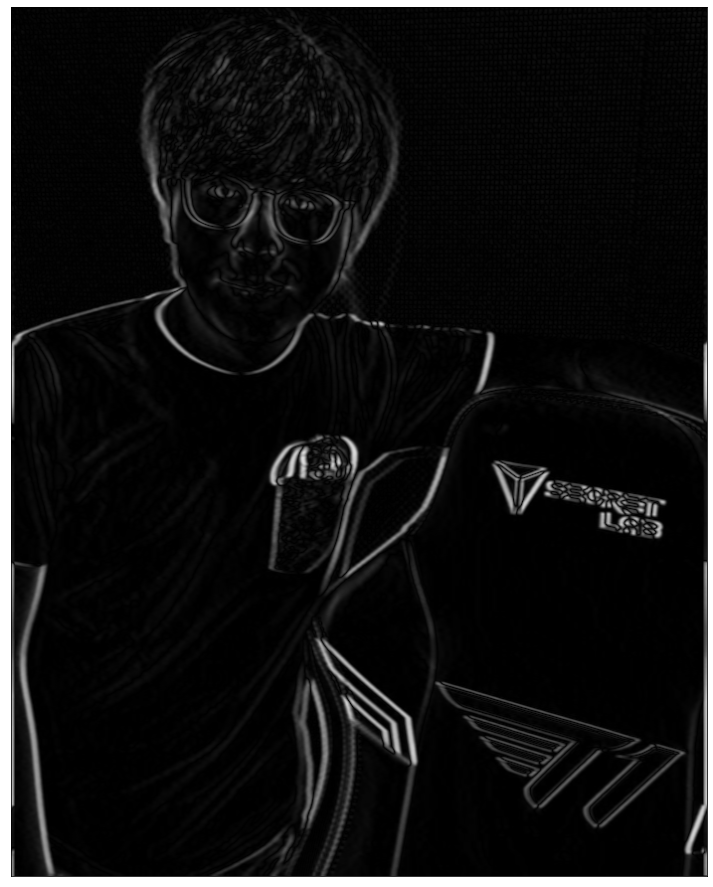

In [5]:
#Scratch Sobel (from selves, laboratory scratch didn't work well)
gray_copy = gray.copy()

kernel_x = np.array(
    [-1,0,1,
    -2,0,2,
    -1,0,1]
)

kernel_y = np.array(
    [-1,-2,-1,
    0,0,0,
    1,2,1]
)

height = gray_copy.shape[0]
width = gray_copy.shape[1]

gray_blur = cv2.GaussianBlur(gray_copy,(3,3), 5).flatten()

#valid = convolve not overlap, Full = convolve until overlap, same = similar with full
X_res = np.convolve(gray_blur, kernel_x, "same")
Y_res = np.convolve(gray_blur, kernel_y, "same")

res = np.hypot(X_res, Y_res)
res = np.reshape(res, gray_copy.shape)

plt.figure(figsize=(16,16))        
plt.imshow(res, cmap="gray")
plt.xticks([]),plt.yticks([])